# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [2]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

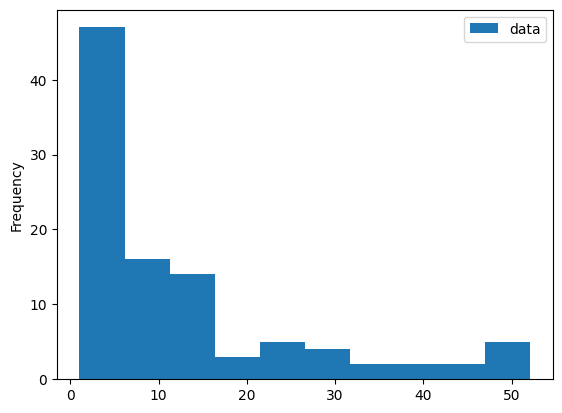

In [3]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

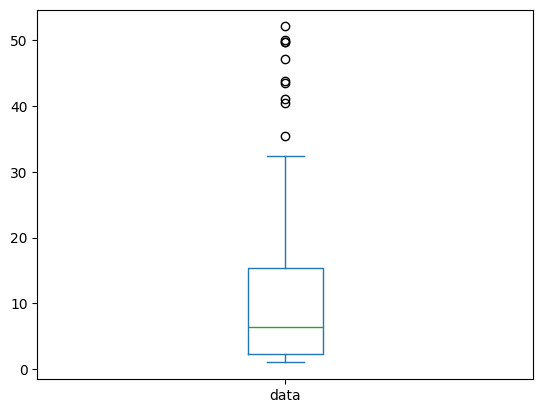

In [4]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.


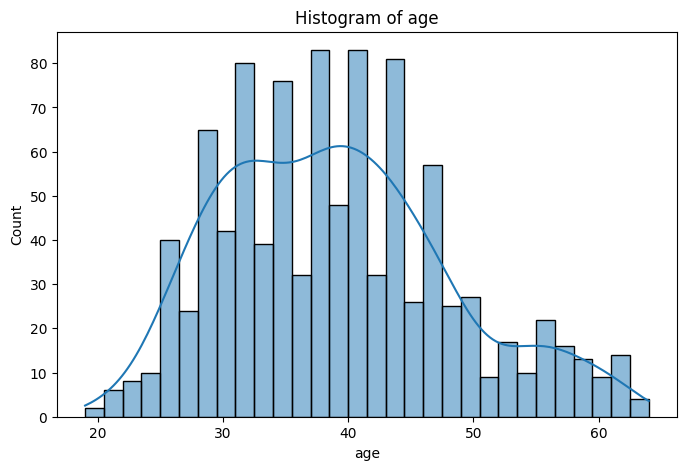

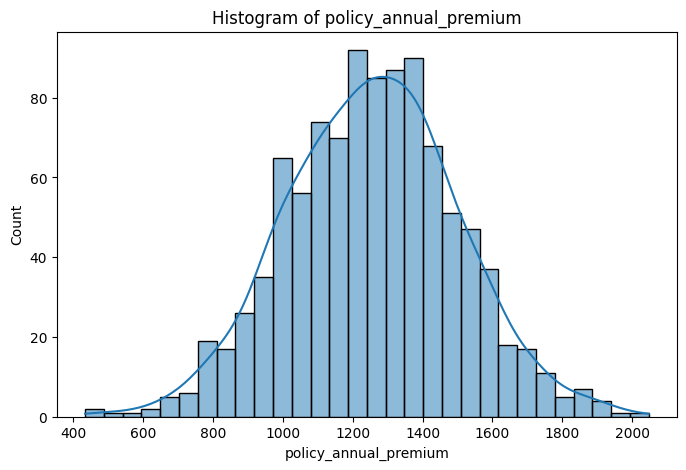

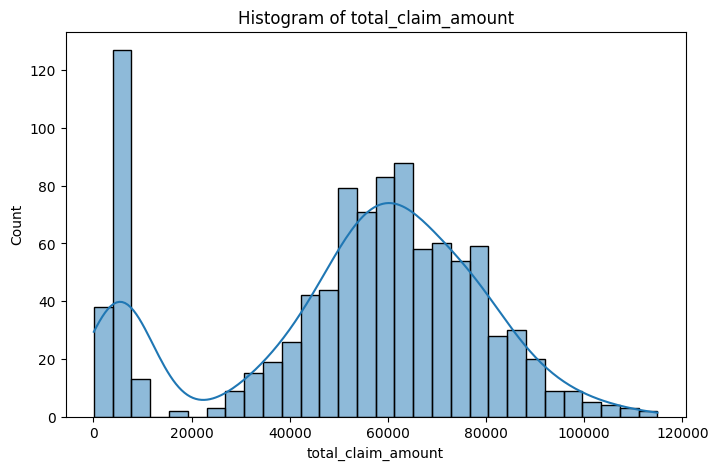

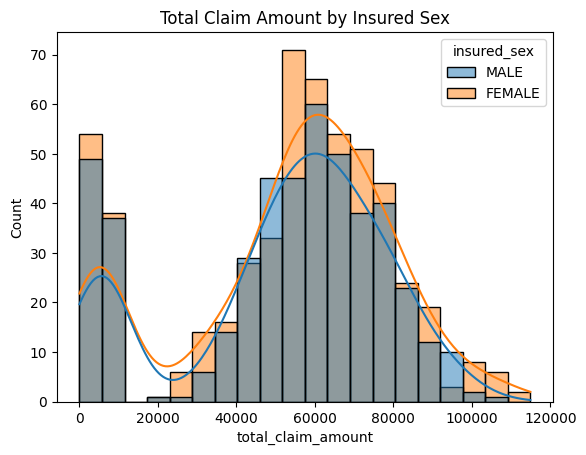

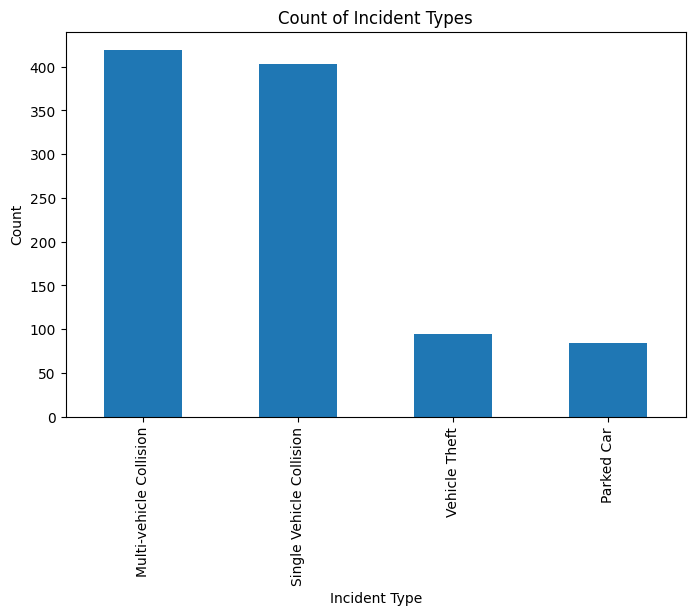

Summary Statistics:
                age  policy_annual_premium  total_claim_amount
count  1000.000000            1000.000000          1000.00000
mean     38.948000            1256.406150         52761.94000
std       9.140287             244.167395         26401.53319
min      19.000000             433.330000           100.00000
25%      32.000000            1089.607500         41812.50000
50%      38.000000            1257.200000         58055.00000
75%      44.000000            1415.695000         70592.50000
max      64.000000            2047.590000        114920.00000


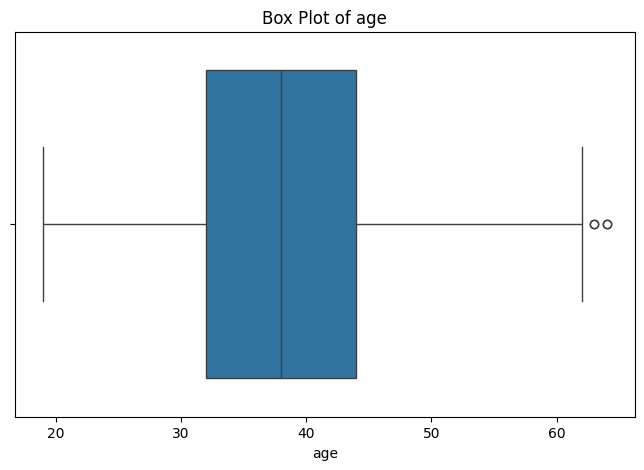

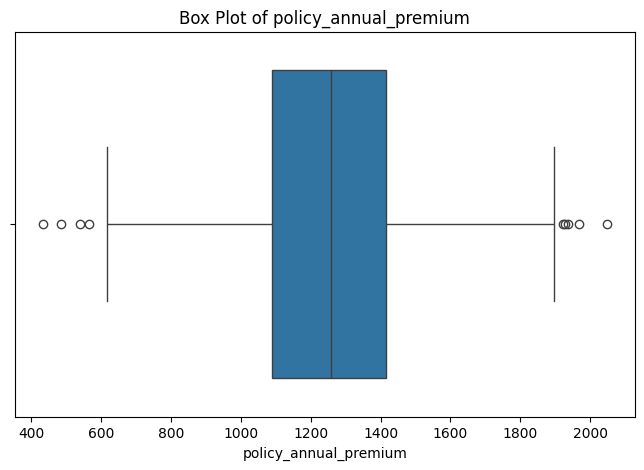

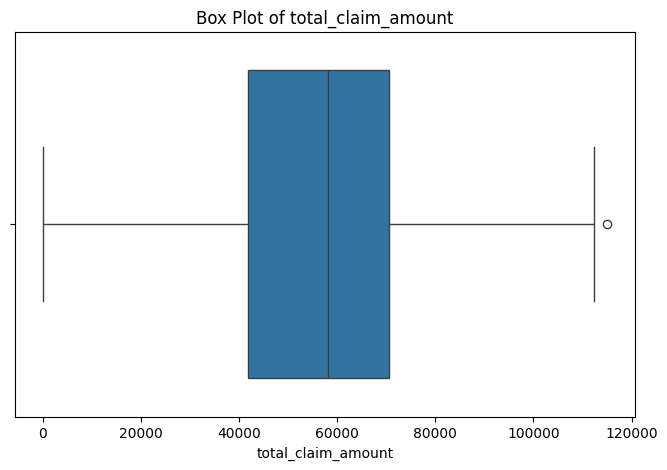

age:
  Mean: 38.948
  Median: 38.0
  Mode: 43

policy_annual_premium:
  Mean: 1256.4061499999998
  Median: 1257.1999999999998
  Mode: 1073.83

total_claim_amount:
  Mean: 52761.94
  Median: 58055.0
  Mode: 59400

injury_claim:
  Mean: 7433.42
  Median: 6775.0
  Mode: 0

property_claim:
  Mean: 7399.57
  Median: 6750.0
  Mode: 0

vehicle_claim:
  Mean: 37928.95
  Median: 42100.0
  Mode: 5040



In [7]:

import matplotlib.pyplot as plt
import seaborn as sns
# link to data https://data.mendeley.com/datasets/992mh7dk9y/2
df = pd.read_csv('insurance_claims_mendeley.csv')

#Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).
numerical_columns = ['age', 'policy_annual_premium', 'total_claim_amount']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.show()

#Draw grouped histograms.  Male vs Female
sns.histplot(data=df, x='total_claim_amount', hue='insured_sex', kde=True)
plt.title('Total Claim Amount by Insured Sex')
plt.show()

# Draw a bar plot to indicate total counts of each categorical variable in a given column.
plt.figure(figsize=(8, 5))
df['incident_type'].value_counts().plot(kind='bar')
plt.title('Count of Incident Types')
plt.ylabel('Count')
plt.xlabel('Incident Type')
plt.show()

# 4. Summary Statistics with box plot
summary_stats = df[numerical_columns].describe()
print("Summary Statistics:\n", summary_stats)

numerical_columns = ['age', 'policy_annual_premium', 'total_claim_amount']

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


# Find means, medians, and modes.
numerical_columns = ['age', 'policy_annual_premium', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']

results = {}
for col in numerical_columns:
    mean_value = df[col].mean()
    median_value = df[col].median()
    mode_value = df[col].mode().iloc[0]  # Mode can have multiple values; take the first one
    results[col] = {'Mean': mean_value, 'Median': median_value, 'Mode': mode_value}

for col, stats in results.items():
    print(f"{col}:")
    print(f"  Mean: {stats['Mean']}")
    print(f"  Median: {stats['Median']}")
    print(f"  Mode: {stats['Mode']}\n")


### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data! 
    - For this homework I delved deeper into each categories and attempted to find a trend in certain columns. Data is useable as a supplemental data to the analysis completed in homework 3. For example we can see determine which claim amounts are outliers and should raise a red flag by age/sex.
- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?
    - Data is moslty normal distribution with a bit of skew in the lower claim amounts. This maybe due to there is two parties of the accident, insured who may be at fault who will likely want to keep the claim amount small for their own claim and claimants who would want to maximize their claim with any potential injury and property damage.
- Are there any outliers present?  (Data points that are far from the others.)
    - Outliers present in all columns in the lower range of claim amounts.
- If there are multiple related histograms, how does the distribution change across different groups?
    - We can see that for both age and sex, there is similar distribtuion between the two groups.
- What are the minimum and maximum values represented in each histogram?
    - age ranges from 0 to 72, and claim amount goes from 0 to 13000
- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?
    - If the bins were bigger we would not be able to identify the close trends. If the bins were too small, it will negate the purpose of the graph where we want to show the bigger picutre.
- Does the distribution appear normal, or does it have a different distribution?
    - Most of the distributions are normal with skew towards the lower claim severity. Comparing age with claim amount, distribution was almost even with skew at the top and bottom end. Which might be a result of younger drivers causing bigger accident.
    

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

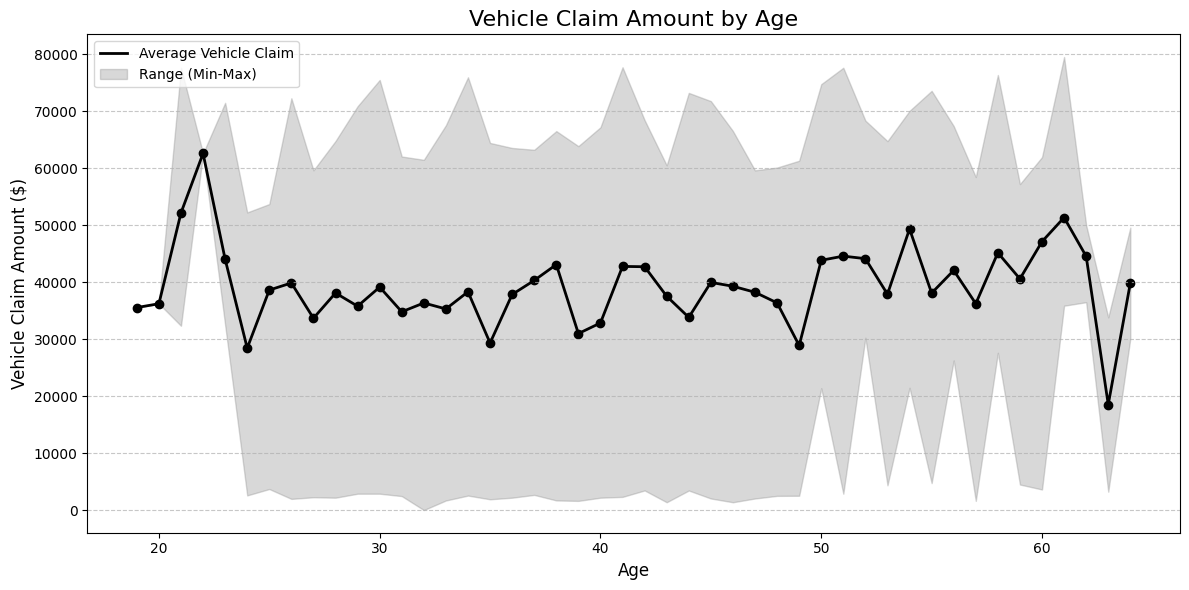

In [6]:
# Page 58 graph with min,med,max with average as line.
age_stats = df.groupby('age')['vehicle_claim'].agg(['mean', 'min', 'max']).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(age_stats['age'], age_stats['mean'], label='Average Vehicle Claim', color='black', linewidth=2)
plt.fill_between(age_stats['age'], age_stats['min'], age_stats['max'], color='gray', alpha=0.3, label='Range (Min-Max)')
plt.scatter(age_stats['age'], age_stats['mean'], color='black')  # Highlight average points

plt.title('Vehicle Claim Amount by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Vehicle Claim Amount ($)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()